In [3]:
#------------This program computes MSD for isotropic Maxwell Voigt fluid------------
import numpy as np
from math import *
from random import *
import matplotlib.pyplot as plt
from pylab import rcParams
from datetime import datetime
fig = plt.figure()


<Figure size 432x288 with 0 Axes>

In [4]:

                                                                   # no of points we want in the msd plot
x_arr = np.loadtxt('x_arr_vts_00.txt')                                      #all elements are in micron
y_arr = np.loadtxt('y_arr_vts_00.txt')                                       #all elements are in micron
t_arr = np.loadtxt('dt_arr_vts_00.txt')



In [7]:
dt_min=1e-8                                                                   #initial time step
dt_max=1e4                                                                   #final time step in msd graph
msd_xarr=[]                                                                    #mean squared x
msd_yarr=[]                                                                    #mean squared y
msd_rarr=[]                                                                    #r is the msd array
mean_t_arr=[]                                                                  #dtarray for msd plot

N = 30    
timelaglog= np.logspace( np.log10(dt_min), np.log10(dt_max), num=N ) #nonzero points for msd plot(distributed linearly in log scale)
counterarray=[]                                                                 #no of data averaging for particular dt


In [9]:
time1=datetime.now().strftime('%Y-%m-%d %H:%M:%S') # --------Timer starts now----

for m in range(0,len(timelaglog)-1):
    print(m)
    r=0 
    x=0
    y=0 
    count=0                                                                   #counter no of elements for data avraging for particular dt
    for i in range(len(t_arr)):
        for j in range(i+1,len(t_arr)):
            timelag = t_arr[j]-t_arr[i]                                       #time difference between i'th and j'th elements
            if timelag >= timelaglog[m] and timelag <= timelaglog[m+1]:
                x = x+((x_arr[j]-x_arr[i])**2)
                y = y+((y_arr[j]-y_arr[i])**2)
                count = count+1
    
    print('no. of points in bin',count)
    x=float(x/count)
    y=float(y/count)
    r=float(x+y) 
    msd_xarr.append(x)
    msd_yarr.append(y)                                                          #msd for a particual dt
    msd_rarr.append(r)
    mean_t_arr.append(np.sqrt(timelaglog[m]*timelaglog[m+1]))
    print('tau=',timelaglog[m]*timelaglog[m+1])
    counterarray.append(count)
    
    
 

time2 = datetime.now().strftime('%Y-%m-%d %H:%M:%S') # --------Timer ends now------
print(time1)
print(time2) 


0


KeyboardInterrupt: 

In [10]:
np.savetxt('msd_x_iso.txt',msd_xarr)
np.savetxt('msd_y_iso.txt',msd_yarr)
np.savetxt('msd_r_iso.txt',msd_rarr)
np.savetxt('t_arr_formsd_iso.txt',mean_t_arr)
np.savetxt('counterarray.txt',counterarray)


In [27]:
df_a

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
time,1.610262e-08,4.175319e-08,1.082637e-07,2.807216e-07,7.278954e-07,1.887392e-06,4.893901e-06,1.268961e-05,3.290345e-05,8.531679e-05,...,1.172102e+00,3.039195e+00,7.880463e+00,2.043360e+01,5.298317e+01,1.373824e+02,3.562248e+02,9.236709e+02,2.395027e+03,6.210169e+03
msd_r,1.364040e-20,3.777316e-20,8.999636e-20,2.229939e-19,4.442182e-19,7.409937e-19,8.141640e-19,8.953713e-19,8.678231e-19,9.220442e-19,...,9.503803e-19,1.123867e-18,1.536426e-18,2.701979e-18,5.348192e-18,1.337036e-17,3.587103e-17,8.136793e-17,2.286007e-16,6.136604e-16
msd_x,7.017144e-21,1.913030e-20,4.536171e-20,1.131704e-19,2.365970e-19,3.639657e-19,3.990391e-19,4.497556e-19,4.433717e-19,4.743765e-19,...,4.587011e-19,5.644600e-19,7.532644e-19,1.351579e-18,2.595816e-18,6.688175e-18,1.767688e-17,4.138564e-17,1.173856e-16,3.047574e-16
msd_y,6.623259e-21,1.864286e-20,4.463465e-20,1.098235e-19,2.076211e-19,3.770279e-19,4.151249e-19,4.456157e-19,4.244514e-19,4.476677e-19,...,4.916792e-19,5.594070e-19,7.831616e-19,1.350401e-18,2.752376e-18,6.682190e-18,1.819415e-17,3.998228e-17,1.112151e-16,3.089030e-16


In [29]:
df_a_tp

,time,msd_r,msd_x,msd_y
0,1.610262e-08,1.364040e-20,7.017144e-21,6.623259e-21
1,4.175319e-08,3.777316e-20,1.913030e-20,1.864286e-20
2,1.082637e-07,8.999636e-20,4.536171e-20,4.463465e-20
3,2.807216e-07,2.229939e-19,1.131704e-19,1.098235e-19
4,7.278954e-07,4.442182e-19,2.365970e-19,2.076211e-19
5,1.887392e-06,7.409937e-19,3.639657e-19,3.770279e-19
6,4.893901e-06,8.141640e-19,3.990391e-19,4.151249e-19
7,1.268961e-05,8.953713e-19,4.497556e-19,4.456157e-19
8,3.290345e-05,8.678231e-19,4.433717e-19,4.244514e-19
9,8.531679e-05,9.220442e-19,4.743765e-19,4.476677e-19


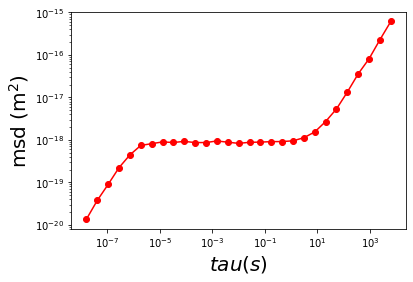

In [9]:


plt.plot(mean_t_arr,msd_rarr,'ro-')
plt.ylabel('msd (m$^2$)',size=20)
plt.xlabel(r'$tau (s)$', size =20)
plt.xscale('log')
plt.yscale('log')


plt.show()


In [14]:
import numpy
a = numpy.asarray([ mean_t_arr, msd_rarr, msd_xarr, msd_yarr])
index = ['time', 'msd_r', 'msd_x', 'msd_y']

import pandas as pd
df_a = pd.DataFrame(a, index)
df_a_tp = pd.DataFrame.transpose(df_a)

numpy.savetxt("mvm_vts_iso.csv", df_a_tp, delimiter=",")